# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
import sys
print(sys.version)

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

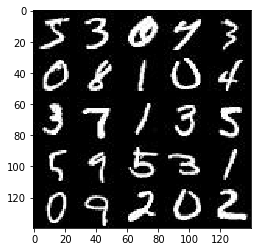

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

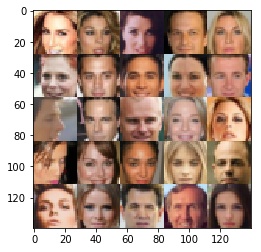

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_z_placeholder = tf.placeholder(
        tf.float32,
        [None, z_dim],
        name='input_z_tensor')
        
    input_real_placeholder = tf.placeholder(
        tf.float32,
        [None, image_width, image_height, image_channels],
        name='input_real_tensor')
      
    learning_rate_placeholder = tf.placeholder(
        tf.float32,
        [],
        name='learning_rate_tensor')

    return input_real_placeholder, input_z_placeholder, learning_rate_placeholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [23]:
#because tf.nn.relu performs very poor if used in generator (generator loss is very high and keeps increasing)
def leaky_relu(x, alpha=0.01):
    return tf.maximum(alpha*x, x)

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [24]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        
        
        # Convolution Layer
        conv_0 = tf.layers.conv2d(images, 32, 5, strides=1, padding='same')
        conv_0 = leaky_relu(conv_0)
       
        
        # Convolution Layer
        conv_1 = tf.layers.conv2d(conv_0, 64, 5, strides=1, padding='same', activation=tf.nn.relu)
        conv_1 = tf.layers.batch_normalization(conv_1, training=True)
        conv_1 = leaky_relu(conv_1)
        
        
        
        # Convolution Layer
        conv_2 = tf.layers.conv2d(conv_1, 128, 5, strides=2, padding='same', activation=tf.nn.relu)
        conv_2 = tf.layers.batch_normalization(conv_2, training=True)
        conv_2 = leaky_relu(conv_2)
        
        
        # Convolution Layer
        conv_3 = tf.layers.conv2d(conv_2, 256, 5, strides=2, padding='same', activation=tf.nn.relu)
        conv_3 = tf.layers.batch_normalization(conv_3, training=True)
        conv_3 = leaky_relu(conv_3)
        
        # Flatten Layer
        flattened = tf.reshape(conv_3, (-1, 7*7*256))
        
        #Output
        logits = tf.layers.dense(flattened, 1)
        output = tf.sigmoid(logits)

        return output, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):

        # Fully Connected
        dense = tf.layers.dense(z, 7*7*256)
        # Reshape
        dense = tf.reshape(dense, (-1, 7, 7, 256))
        
        # DeConv Layer
        conv_0 = tf.layers.conv2d_transpose(dense, 128, 5, strides=2, padding='same')
        conv_0 = tf.layers.batch_normalization(conv_0, training=is_train)
        conv_0 = leaky_relu(conv_0)
        
        # DeConv Layer
        conv_01 = tf.layers.conv2d_transpose(conv_0, 64, 5, strides=2, padding='same')
        conv_01 = tf.layers.batch_normalization(conv_01, training=is_train)
        conv_01 = leaky_relu(conv_01)
        
        # DeConv Layer
        conv_1 = tf.layers.conv2d_transpose(conv_01, 32, 5, strides=1, padding='same')
        conv_1 = tf.layers.batch_normalization(conv_1, training=is_train)
        conv_1 = leaky_relu(conv_1)
        
        # DeConv Layer
        conv_2 = tf.layers.conv2d_transpose(conv_1, 16, 5, strides=1, padding='same')
        conv_2 = tf.layers.batch_normalization(conv_2, training=is_train)
        conv_2 = leaky_relu(conv_2)
        
        # Convolution (logits)
        conv_3 = tf.layers.conv2d_transpose(conv_2, out_channel_dim, 5, strides=1, padding='same')
        
        
        output = tf.tanh(conv_3)
        
        return output




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real,
                                                labels=tf.ones_like(disc_logits_real)))
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                labels=tf.zeros_like(disc_logits_fake)))
    disc_total_loss = disc_loss_real + disc_loss_fake

    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                labels=tf.ones_like(disc_logits_fake)))
    
    return disc_total_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]

    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    disc_update_ops = [var for var in update_ops if var.name.startswith('discriminator')]
    gen_update_ops = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(disc_update_ops):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
    with tf.control_dependencies(gen_update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)

    return disc_train_opt, gen_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _ , image_width, image_height, image_channels = data_shape
    real_input, z_input, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(real_input, z_input, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, learning_rate, beta1)
    
    losses = []
    print_loss_after_batches = 20
    show_output_after_batches = 400
    step = 0
    figsize = (5,5)
    
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images *= 2 # converting -.5 .5 to -1 1
                step += 1
                z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(disc_opt, feed_dict={real_input: batch_images, z_input: z, learn_rate: learning_rate})
                _ = sess.run(gen_opt, feed_dict={z_input: z,  learn_rate: learning_rate})
                
                if step % print_loss_after_batches == 0:
                    # At the end of each epoch, get the losses and print them out
                    disc_training_loss = disc_loss.eval({z_input: z, real_input: batch_images})
                    gen_training_loss = gen_loss.eval({z_input: z})
                    losses.append((disc_training_loss, gen_training_loss))
                    print("Epoch %i of %i " % (epoch+1, epochs), "Generator loss : %f" % gen_training_loss,
                          "Discrimator loss : %f" % disc_training_loss)
                      
                if step % show_output_after_batches== 0:
                    show_generator_output(sess, 25, z_input, image_channels, data_image_mode)
        show_generator_output(sess, 25, z_input, image_channels, data_image_mode)
    return losses        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1 of 2  Generator loss : 0.038058 Discrimator loss : 3.553468
Epoch 1 of 2  Generator loss : 0.154547 Discrimator loss : 2.250168
Epoch 1 of 2  Generator loss : 0.351743 Discrimator loss : 1.622208
Epoch 1 of 2  Generator loss : 0.418164 Discrimator loss : 1.261717
Epoch 1 of 2  Generator loss : 1.004695 Discrimator loss : 0.824036
Epoch 1 of 2  Generator loss : 1.845516 Discrimator loss : 0.447374
Epoch 1 of 2  Generator loss : 2.432434 Discrimator loss : 0.206566
Epoch 1 of 2  Generator loss : 2.446779 Discrimator loss : 0.219727
Epoch 1 of 2  Generator loss : 2.915794 Discrimator loss : 0.392282
Epoch 1 of 2  Generator loss : 3.933685 Discrimator loss : 0.171571
Epoch 1 of 2  Generator loss : 4.001536 Discrimator loss : 0.257839
Epoch 1 of 2  Generator loss : 1.211536 Discrimator loss : 0.745943
Epoch 1 of 2  Generator loss : 1.489666 Discrimator loss : 0.440504
Epoch 1 of 2  Generator loss : 1.846915 Discrimator loss : 0.408204
Epoch 1 of 2  Generator loss : 2.040179 Discrima

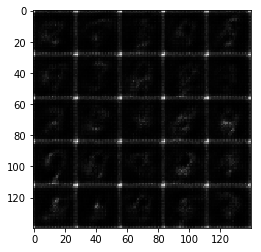

Epoch 1 of 2  Generator loss : 1.506930 Discrimator loss : 0.466726
Epoch 1 of 2  Generator loss : 1.518058 Discrimator loss : 0.454027
Epoch 1 of 2  Generator loss : 1.326968 Discrimator loss : 0.807425
Epoch 1 of 2  Generator loss : 1.479753 Discrimator loss : 0.822850
Epoch 1 of 2  Generator loss : 1.506264 Discrimator loss : 0.495799
Epoch 1 of 2  Generator loss : 1.050900 Discrimator loss : 0.823881
Epoch 1 of 2  Generator loss : 1.139325 Discrimator loss : 0.645987
Epoch 1 of 2  Generator loss : 2.393137 Discrimator loss : 0.240365
Epoch 1 of 2  Generator loss : 4.023282 Discrimator loss : 0.201489
Epoch 1 of 2  Generator loss : 1.843257 Discrimator loss : 0.423744
Epoch 1 of 2  Generator loss : 1.362260 Discrimator loss : 0.540325
Epoch 1 of 2  Generator loss : 0.946005 Discrimator loss : 0.786015
Epoch 1 of 2  Generator loss : 0.448483 Discrimator loss : 1.229573
Epoch 1 of 2  Generator loss : 1.395718 Discrimator loss : 0.661673
Epoch 1 of 2  Generator loss : 1.894451 Discrima

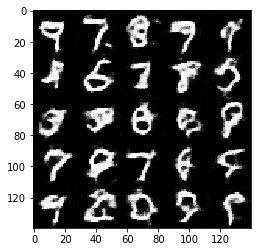

Epoch 1 of 2  Generator loss : 0.951155 Discrimator loss : 1.187032
Epoch 1 of 2  Generator loss : 1.439975 Discrimator loss : 0.727358
Epoch 1 of 2  Generator loss : 3.764084 Discrimator loss : 0.581498
Epoch 1 of 2  Generator loss : 2.007253 Discrimator loss : 0.485155
Epoch 1 of 2  Generator loss : 1.603947 Discrimator loss : 0.462698
Epoch 1 of 2  Generator loss : 1.898842 Discrimator loss : 0.650471
Epoch 1 of 2  Generator loss : 2.834645 Discrimator loss : 0.265627
Epoch 1 of 2  Generator loss : 3.706146 Discrimator loss : 0.085568
Epoch 1 of 2  Generator loss : 2.381090 Discrimator loss : 0.347299
Epoch 1 of 2  Generator loss : 2.063960 Discrimator loss : 0.686487
Epoch 1 of 2  Generator loss : 0.867851 Discrimator loss : 0.918303
Epoch 1 of 2  Generator loss : 2.538857 Discrimator loss : 0.302889
Epoch 1 of 2  Generator loss : 2.385082 Discrimator loss : 0.240847
Epoch 1 of 2  Generator loss : 2.535336 Discrimator loss : 0.218017
Epoch 1 of 2  Generator loss : 2.005019 Discrima

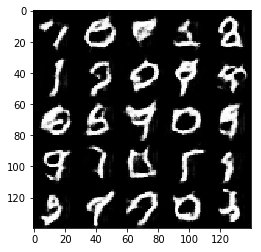

Epoch 1 of 2  Generator loss : 2.763555 Discrimator loss : 0.260418
Epoch 1 of 2  Generator loss : 2.172920 Discrimator loss : 0.334069
Epoch 1 of 2  Generator loss : 1.045541 Discrimator loss : 0.623884
Epoch 1 of 2  Generator loss : 2.420155 Discrimator loss : 0.255637
Epoch 1 of 2  Generator loss : 2.522998 Discrimator loss : 0.331334
Epoch 1 of 2  Generator loss : 2.970075 Discrimator loss : 0.200893
Epoch 1 of 2  Generator loss : 1.961358 Discrimator loss : 0.340992
Epoch 1 of 2  Generator loss : 1.642946 Discrimator loss : 0.544066
Epoch 1 of 2  Generator loss : 2.113719 Discrimator loss : 0.444963
Epoch 1 of 2  Generator loss : 1.314202 Discrimator loss : 0.846305
Epoch 1 of 2  Generator loss : 1.626717 Discrimator loss : 0.562837
Epoch 1 of 2  Generator loss : 1.641414 Discrimator loss : 0.531190
Epoch 1 of 2  Generator loss : 4.086857 Discrimator loss : 0.064634
Epoch 1 of 2  Generator loss : 1.935073 Discrimator loss : 0.271309
Epoch 1 of 2  Generator loss : 2.706093 Discrima

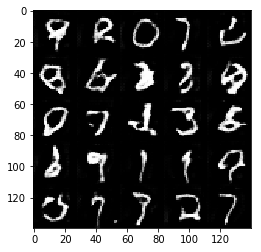

Epoch 1 of 2  Generator loss : 4.052571 Discrimator loss : 0.289232
Epoch 1 of 2  Generator loss : 0.691468 Discrimator loss : 1.438350
Epoch 1 of 2  Generator loss : 2.705385 Discrimator loss : 0.230220
Epoch 1 of 2  Generator loss : 1.658944 Discrimator loss : 0.691009
Epoch 1 of 2  Generator loss : 2.076453 Discrimator loss : 0.217543
Epoch 1 of 2  Generator loss : 1.561622 Discrimator loss : 0.614184
Epoch 1 of 2  Generator loss : 2.359401 Discrimator loss : 0.211164
Epoch 1 of 2  Generator loss : 1.753116 Discrimator loss : 0.388317
Epoch 1 of 2  Generator loss : 3.191691 Discrimator loss : 0.189518
Epoch 1 of 2  Generator loss : 3.036858 Discrimator loss : 0.211574
Epoch 1 of 2  Generator loss : 7.987586 Discrimator loss : 0.683350
Epoch 1 of 2  Generator loss : 1.416056 Discrimator loss : 0.747018
Epoch 1 of 2  Generator loss : 1.471037 Discrimator loss : 0.536547
Epoch 1 of 2  Generator loss : 3.200416 Discrimator loss : 0.126385
Epoch 1 of 2  Generator loss : 4.730570 Discrima

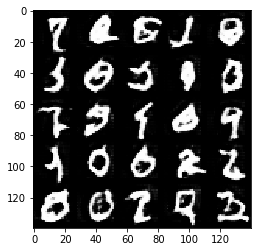

Epoch 1 of 2  Generator loss : 2.648794 Discrimator loss : 0.404428
Epoch 1 of 2  Generator loss : 2.667196 Discrimator loss : 0.307221
Epoch 1 of 2  Generator loss : 4.262473 Discrimator loss : 0.116954
Epoch 1 of 2  Generator loss : 1.790098 Discrimator loss : 0.646709
Epoch 1 of 2  Generator loss : 0.437300 Discrimator loss : 1.931294
Epoch 1 of 2  Generator loss : 3.809949 Discrimator loss : 0.093446
Epoch 1 of 2  Generator loss : 1.778073 Discrimator loss : 0.355259
Epoch 1 of 2  Generator loss : 0.355378 Discrimator loss : 1.672321
Epoch 1 of 2  Generator loss : 2.317304 Discrimator loss : 0.239759
Epoch 1 of 2  Generator loss : 0.539031 Discrimator loss : 1.431155
Epoch 1 of 2  Generator loss : 2.427693 Discrimator loss : 0.175563
Epoch 1 of 2  Generator loss : 1.378572 Discrimator loss : 0.632825
Epoch 1 of 2  Generator loss : 2.229737 Discrimator loss : 0.249574
Epoch 1 of 2  Generator loss : 7.020358 Discrimator loss : 0.235683
Epoch 1 of 2  Generator loss : 0.618510 Discrima

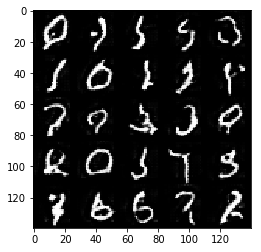

Epoch 1 of 2  Generator loss : 0.924059 Discrimator loss : 1.320488
Epoch 1 of 2  Generator loss : 2.538730 Discrimator loss : 0.349317
Epoch 1 of 2  Generator loss : 1.165033 Discrimator loss : 1.131432
Epoch 1 of 2  Generator loss : 3.520725 Discrimator loss : 0.138718
Epoch 1 of 2  Generator loss : 2.627831 Discrimator loss : 0.229517
Epoch 1 of 2  Generator loss : 1.466495 Discrimator loss : 0.379892
Epoch 1 of 2  Generator loss : 2.144799 Discrimator loss : 0.264374
Epoch 1 of 2  Generator loss : 1.699443 Discrimator loss : 0.432945
Epoch 1 of 2  Generator loss : 3.694561 Discrimator loss : 0.155801
Epoch 1 of 2  Generator loss : 2.380329 Discrimator loss : 0.248095
Epoch 1 of 2  Generator loss : 2.111539 Discrimator loss : 0.344736
Epoch 1 of 2  Generator loss : 1.275022 Discrimator loss : 0.596972
Epoch 1 of 2  Generator loss : 2.049409 Discrimator loss : 0.480745
Epoch 1 of 2  Generator loss : 1.098576 Discrimator loss : 0.818601
Epoch 1 of 2  Generator loss : 1.717909 Discrima

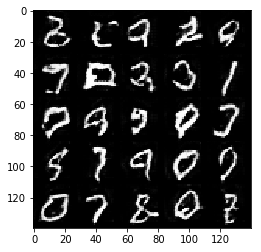

Epoch 1 of 2  Generator loss : 3.393024 Discrimator loss : 0.193011
Epoch 1 of 2  Generator loss : 2.079845 Discrimator loss : 0.291296
Epoch 1 of 2  Generator loss : 1.481368 Discrimator loss : 0.655122
Epoch 1 of 2  Generator loss : 0.624201 Discrimator loss : 1.633912
Epoch 1 of 2  Generator loss : 1.434153 Discrimator loss : 0.541292
Epoch 1 of 2  Generator loss : 1.481490 Discrimator loss : 0.591689
Epoch 1 of 2  Generator loss : 3.034994 Discrimator loss : 0.186570
Epoch 1 of 2  Generator loss : 3.673855 Discrimator loss : 0.084670
Epoch 1 of 2  Generator loss : 3.693524 Discrimator loss : 0.119519
Epoch 1 of 2  Generator loss : 2.087441 Discrimator loss : 0.317746
Epoch 1 of 2  Generator loss : 2.763861 Discrimator loss : 0.171230
Epoch 1 of 2  Generator loss : 3.513599 Discrimator loss : 0.181492
Epoch 1 of 2  Generator loss : 4.457295 Discrimator loss : 0.044759
Epoch 1 of 2  Generator loss : 3.815624 Discrimator loss : 0.354742
Epoch 1 of 2  Generator loss : 2.197250 Discrima

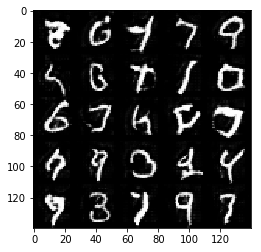

Epoch 1 of 2  Generator loss : 2.767652 Discrimator loss : 0.215401
Epoch 1 of 2  Generator loss : 2.614393 Discrimator loss : 0.173085
Epoch 1 of 2  Generator loss : 1.814420 Discrimator loss : 0.358248
Epoch 1 of 2  Generator loss : 5.091806 Discrimator loss : 0.049693
Epoch 1 of 2  Generator loss : 2.961625 Discrimator loss : 0.333768
Epoch 1 of 2  Generator loss : 3.429729 Discrimator loss : 0.112875
Epoch 1 of 2  Generator loss : 1.883992 Discrimator loss : 0.287006
Epoch 1 of 2  Generator loss : 1.623858 Discrimator loss : 0.417043
Epoch 1 of 2  Generator loss : 1.385065 Discrimator loss : 0.664227
Epoch 1 of 2  Generator loss : 2.542022 Discrimator loss : 0.264273
Epoch 1 of 2  Generator loss : 1.829547 Discrimator loss : 0.343263
Epoch 1 of 2  Generator loss : 0.956437 Discrimator loss : 1.300836
Epoch 1 of 2  Generator loss : 2.828231 Discrimator loss : 0.184093
Epoch 1 of 2  Generator loss : 3.440698 Discrimator loss : 0.135664
Epoch 1 of 2  Generator loss : 3.912770 Discrima

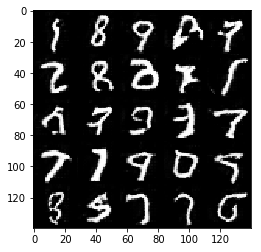

Epoch 1 of 2  Generator loss : 2.443202 Discrimator loss : 0.232862
Epoch 1 of 2  Generator loss : 3.082991 Discrimator loss : 0.153034
Epoch 1 of 2  Generator loss : 2.203304 Discrimator loss : 0.639671
Epoch 1 of 2  Generator loss : 4.217982 Discrimator loss : 0.110424
Epoch 1 of 2  Generator loss : 1.886738 Discrimator loss : 0.362868
Epoch 1 of 2  Generator loss : 7.800560 Discrimator loss : 0.104799
Epoch 1 of 2  Generator loss : 4.964519 Discrimator loss : 0.154425
Epoch 2 of 2  Generator loss : 2.056116 Discrimator loss : 0.391821
Epoch 2 of 2  Generator loss : 3.111298 Discrimator loss : 0.221563
Epoch 2 of 2  Generator loss : 2.438801 Discrimator loss : 0.528797
Epoch 2 of 2  Generator loss : 3.958062 Discrimator loss : 0.233024
Epoch 2 of 2  Generator loss : 1.684910 Discrimator loss : 0.430322
Epoch 2 of 2  Generator loss : 1.903282 Discrimator loss : 0.544177
Epoch 2 of 2  Generator loss : 3.372180 Discrimator loss : 0.214009
Epoch 2 of 2  Generator loss : 1.634868 Discrima

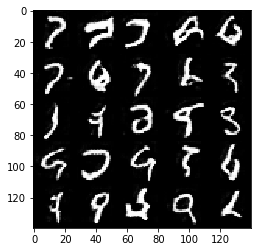

Epoch 2 of 2  Generator loss : 0.892446 Discrimator loss : 1.155678
Epoch 2 of 2  Generator loss : 2.007662 Discrimator loss : 0.369983
Epoch 2 of 2  Generator loss : 1.296396 Discrimator loss : 0.782902
Epoch 2 of 2  Generator loss : 1.442099 Discrimator loss : 0.536492
Epoch 2 of 2  Generator loss : 1.363988 Discrimator loss : 0.863020
Epoch 2 of 2  Generator loss : 1.854105 Discrimator loss : 0.324247
Epoch 2 of 2  Generator loss : 2.168162 Discrimator loss : 0.325545
Epoch 2 of 2  Generator loss : 1.493002 Discrimator loss : 0.611044
Epoch 2 of 2  Generator loss : 7.360317 Discrimator loss : 0.256929
Epoch 2 of 2  Generator loss : 2.330905 Discrimator loss : 0.421831
Epoch 2 of 2  Generator loss : 2.624119 Discrimator loss : 0.247962
Epoch 2 of 2  Generator loss : 4.299058 Discrimator loss : 0.110490
Epoch 2 of 2  Generator loss : 3.036661 Discrimator loss : 0.194424
Epoch 2 of 2  Generator loss : 3.410399 Discrimator loss : 0.197594
Epoch 2 of 2  Generator loss : 2.147725 Discrima

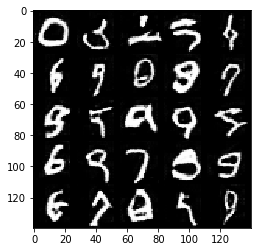

Epoch 2 of 2  Generator loss : 1.896767 Discrimator loss : 0.386183
Epoch 2 of 2  Generator loss : 3.364604 Discrimator loss : 0.167484
Epoch 2 of 2  Generator loss : 3.251601 Discrimator loss : 0.120528
Epoch 2 of 2  Generator loss : 2.806059 Discrimator loss : 0.170758
Epoch 2 of 2  Generator loss : 2.944389 Discrimator loss : 0.238571
Epoch 2 of 2  Generator loss : 2.159112 Discrimator loss : 0.586289
Epoch 2 of 2  Generator loss : 2.511268 Discrimator loss : 0.181827
Epoch 2 of 2  Generator loss : 2.905601 Discrimator loss : 0.180719
Epoch 2 of 2  Generator loss : 5.163986 Discrimator loss : 0.065755
Epoch 2 of 2  Generator loss : 2.627128 Discrimator loss : 0.223218
Epoch 2 of 2  Generator loss : 2.515322 Discrimator loss : 0.288456
Epoch 2 of 2  Generator loss : 2.382826 Discrimator loss : 0.208465
Epoch 2 of 2  Generator loss : 3.403084 Discrimator loss : 0.166799
Epoch 2 of 2  Generator loss : 3.893383 Discrimator loss : 0.082058
Epoch 2 of 2  Generator loss : 4.669559 Discrima

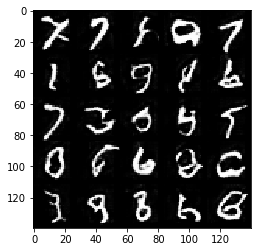

Epoch 2 of 2  Generator loss : 4.421664 Discrimator loss : 0.030897
Epoch 2 of 2  Generator loss : 5.109485 Discrimator loss : 0.101831
Epoch 2 of 2  Generator loss : 2.062917 Discrimator loss : 0.353002
Epoch 2 of 2  Generator loss : 3.813743 Discrimator loss : 0.110385
Epoch 2 of 2  Generator loss : 2.272623 Discrimator loss : 0.326127
Epoch 2 of 2  Generator loss : 2.086974 Discrimator loss : 0.240563
Epoch 2 of 2  Generator loss : 2.512162 Discrimator loss : 0.165751
Epoch 2 of 2  Generator loss : 5.043580 Discrimator loss : 0.091226
Epoch 2 of 2  Generator loss : 2.708933 Discrimator loss : 0.228420
Epoch 2 of 2  Generator loss : 1.783653 Discrimator loss : 0.521924
Epoch 2 of 2  Generator loss : 3.322259 Discrimator loss : 0.079709
Epoch 2 of 2  Generator loss : 0.632240 Discrimator loss : 0.967444
Epoch 2 of 2  Generator loss : 3.004068 Discrimator loss : 0.203561
Epoch 2 of 2  Generator loss : 3.116632 Discrimator loss : 0.186988
Epoch 2 of 2  Generator loss : 4.433741 Discrima

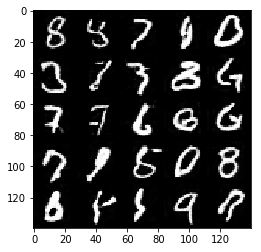

Epoch 2 of 2  Generator loss : 1.948573 Discrimator loss : 0.554287
Epoch 2 of 2  Generator loss : 0.920759 Discrimator loss : 1.150943
Epoch 2 of 2  Generator loss : 1.498826 Discrimator loss : 0.625757
Epoch 2 of 2  Generator loss : 1.409837 Discrimator loss : 0.493038
Epoch 2 of 2  Generator loss : 4.829907 Discrimator loss : 0.664701
Epoch 2 of 2  Generator loss : 2.070179 Discrimator loss : 0.203305
Epoch 2 of 2  Generator loss : 2.919365 Discrimator loss : 0.129973
Epoch 2 of 2  Generator loss : 2.816206 Discrimator loss : 0.136553
Epoch 2 of 2  Generator loss : 2.322945 Discrimator loss : 0.213168
Epoch 2 of 2  Generator loss : 1.582674 Discrimator loss : 0.391106
Epoch 2 of 2  Generator loss : 1.521655 Discrimator loss : 0.416071
Epoch 2 of 2  Generator loss : 1.572093 Discrimator loss : 0.762580
Epoch 2 of 2  Generator loss : 1.675138 Discrimator loss : 0.479582
Epoch 2 of 2  Generator loss : 1.656662 Discrimator loss : 0.378471
Epoch 2 of 2  Generator loss : 1.129607 Discrima

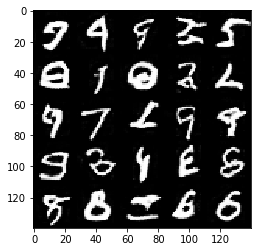

Epoch 2 of 2  Generator loss : 2.475646 Discrimator loss : 0.173533
Epoch 2 of 2  Generator loss : 1.241430 Discrimator loss : 0.621527
Epoch 2 of 2  Generator loss : 2.934920 Discrimator loss : 0.134514
Epoch 2 of 2  Generator loss : 3.608522 Discrimator loss : 0.172695
Epoch 2 of 2  Generator loss : 3.370542 Discrimator loss : 0.145608
Epoch 2 of 2  Generator loss : 2.417101 Discrimator loss : 0.219252
Epoch 2 of 2  Generator loss : 2.591143 Discrimator loss : 0.195277
Epoch 2 of 2  Generator loss : 3.102527 Discrimator loss : 0.219045
Epoch 2 of 2  Generator loss : 1.810994 Discrimator loss : 0.455338
Epoch 2 of 2  Generator loss : 1.267054 Discrimator loss : 0.743134
Epoch 2 of 2  Generator loss : 3.014358 Discrimator loss : 0.164688
Epoch 2 of 2  Generator loss : 1.790592 Discrimator loss : 0.273034
Epoch 2 of 2  Generator loss : 5.304936 Discrimator loss : 0.047248
Epoch 2 of 2  Generator loss : 5.091508 Discrimator loss : 0.027082
Epoch 2 of 2  Generator loss : 0.810439 Discrima

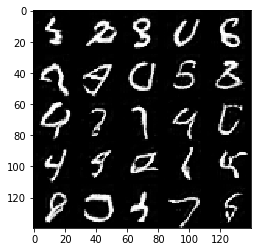

Epoch 2 of 2  Generator loss : 3.034667 Discrimator loss : 0.234340
Epoch 2 of 2  Generator loss : 3.067782 Discrimator loss : 0.162272
Epoch 2 of 2  Generator loss : 2.022307 Discrimator loss : 0.475822
Epoch 2 of 2  Generator loss : 1.650088 Discrimator loss : 0.510294
Epoch 2 of 2  Generator loss : 3.484438 Discrimator loss : 0.066149
Epoch 2 of 2  Generator loss : 1.859632 Discrimator loss : 0.479239
Epoch 2 of 2  Generator loss : 6.156739 Discrimator loss : 0.022172
Epoch 2 of 2  Generator loss : 4.893726 Discrimator loss : 0.038695
Epoch 2 of 2  Generator loss : 2.050058 Discrimator loss : 0.328566
Epoch 2 of 2  Generator loss : 2.734093 Discrimator loss : 0.187292
Epoch 2 of 2  Generator loss : 4.313943 Discrimator loss : 0.081832
Epoch 2 of 2  Generator loss : 0.992862 Discrimator loss : 0.770322
Epoch 2 of 2  Generator loss : 4.437594 Discrimator loss : 0.091352
Epoch 2 of 2  Generator loss : 1.829500 Discrimator loss : 0.415174
Epoch 2 of 2  Generator loss : 2.261327 Discrima

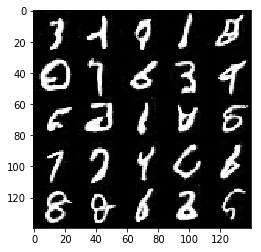

Epoch 2 of 2  Generator loss : 4.242779 Discrimator loss : 0.135562
Epoch 2 of 2  Generator loss : 2.895378 Discrimator loss : 0.130156
Epoch 2 of 2  Generator loss : 4.168350 Discrimator loss : 0.060938
Epoch 2 of 2  Generator loss : 2.512641 Discrimator loss : 0.201749
Epoch 2 of 2  Generator loss : 2.082293 Discrimator loss : 0.203363
Epoch 2 of 2  Generator loss : 1.409441 Discrimator loss : 0.624947
Epoch 2 of 2  Generator loss : 2.888635 Discrimator loss : 0.091104
Epoch 2 of 2  Generator loss : 1.599303 Discrimator loss : 0.693096
Epoch 2 of 2  Generator loss : 3.321250 Discrimator loss : 0.077633
Epoch 2 of 2  Generator loss : 3.747946 Discrimator loss : 0.098565
Epoch 2 of 2  Generator loss : 5.862444 Discrimator loss : 0.084103
Epoch 2 of 2  Generator loss : 1.782459 Discrimator loss : 0.397026
Epoch 2 of 2  Generator loss : 2.983506 Discrimator loss : 0.095491
Epoch 2 of 2  Generator loss : 2.855016 Discrimator loss : 0.198820
Epoch 2 of 2  Generator loss : 5.496513 Discrima

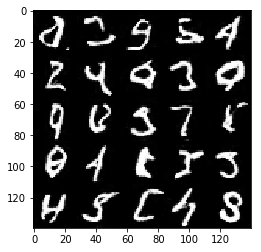

Epoch 2 of 2  Generator loss : 4.985825 Discrimator loss : 0.077355
Epoch 2 of 2  Generator loss : 2.165125 Discrimator loss : 0.302420
Epoch 2 of 2  Generator loss : 1.868618 Discrimator loss : 0.288789
Epoch 2 of 2  Generator loss : 2.967417 Discrimator loss : 0.154373
Epoch 2 of 2  Generator loss : 1.381195 Discrimator loss : 0.626103
Epoch 2 of 2  Generator loss : 2.935249 Discrimator loss : 0.200588
Epoch 2 of 2  Generator loss : 2.167231 Discrimator loss : 0.196208
Epoch 2 of 2  Generator loss : 1.327768 Discrimator loss : 0.470523
Epoch 2 of 2  Generator loss : 2.298794 Discrimator loss : 0.238119
Epoch 2 of 2  Generator loss : 0.836554 Discrimator loss : 0.787175
Epoch 2 of 2  Generator loss : 5.155274 Discrimator loss : 0.045032
Epoch 2 of 2  Generator loss : 3.159702 Discrimator loss : 0.186320
Epoch 2 of 2  Generator loss : 1.200776 Discrimator loss : 0.691671
Epoch 2 of 2  Generator loss : 2.644456 Discrimator loss : 0.218839
Epoch 2 of 2  Generator loss : 3.076121 Discrima

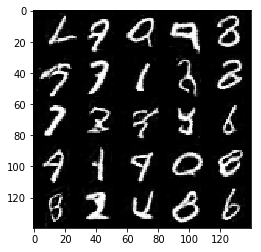

Epoch 2 of 2  Generator loss : 2.437715 Discrimator loss : 0.226111
Epoch 2 of 2  Generator loss : 2.405790 Discrimator loss : 0.180660
Epoch 2 of 2  Generator loss : 3.875800 Discrimator loss : 0.060187
Epoch 2 of 2  Generator loss : 2.269306 Discrimator loss : 0.238071
Epoch 2 of 2  Generator loss : 3.961422 Discrimator loss : 0.060004
Epoch 2 of 2  Generator loss : 0.794723 Discrimator loss : 1.571830
Epoch 2 of 2  Generator loss : 2.326713 Discrimator loss : 0.247948
Epoch 2 of 2  Generator loss : 3.165812 Discrimator loss : 0.108027
Epoch 2 of 2  Generator loss : 6.049243 Discrimator loss : 1.174140
Epoch 2 of 2  Generator loss : 4.589805 Discrimator loss : 0.062011
Epoch 2 of 2  Generator loss : 3.552062 Discrimator loss : 0.175653
Epoch 2 of 2  Generator loss : 3.163774 Discrimator loss : 0.092740
Epoch 2 of 2  Generator loss : 3.387465 Discrimator loss : 0.120985
Epoch 2 of 2  Generator loss : 2.683263 Discrimator loss : 0.257096
Epoch 2 of 2  Generator loss : 4.457808 Discrima

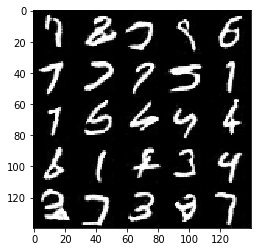

In [20]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1 of 1  Generator loss : 44.529991 Discrimator loss : 0.434018
Epoch 1 of 1  Generator loss : 0.816545 Discrimator loss : 4.368688
Epoch 1 of 1  Generator loss : 0.726963 Discrimator loss : 1.410447
Epoch 1 of 1  Generator loss : 0.641295 Discrimator loss : 1.592904
Epoch 1 of 1  Generator loss : 0.876938 Discrimator loss : 1.148303
Epoch 1 of 1  Generator loss : 2.974556 Discrimator loss : 0.349999
Epoch 1 of 1  Generator loss : 0.383880 Discrimator loss : 2.033353
Epoch 1 of 1  Generator loss : 5.819834 Discrimator loss : 0.042609
Epoch 1 of 1  Generator loss : 0.326462 Discrimator loss : 3.094714
Epoch 1 of 1  Generator loss : 3.868602 Discrimator loss : 0.114495
Epoch 1 of 1  Generator loss : 2.428765 Discrimator loss : 0.258231
Epoch 1 of 1  Generator loss : 3.193843 Discrimator loss : 0.409305
Epoch 1 of 1  Generator loss : 6.750990 Discrimator loss : 0.976687
Epoch 1 of 1  Generator loss : 3.576741 Discrimator loss : 1.087307
Epoch 1 of 1  Generator loss : 0.415983 Discrim

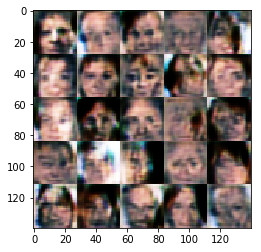

Epoch 1 of 1  Generator loss : 3.213623 Discrimator loss : 1.759153
Epoch 1 of 1  Generator loss : 2.298790 Discrimator loss : 1.164515
Epoch 1 of 1  Generator loss : 0.150731 Discrimator loss : 2.594112
Epoch 1 of 1  Generator loss : 3.373154 Discrimator loss : 0.960178
Epoch 1 of 1  Generator loss : 0.305865 Discrimator loss : 1.966408
Epoch 1 of 1  Generator loss : 1.004912 Discrimator loss : 1.396774
Epoch 1 of 1  Generator loss : 0.764937 Discrimator loss : 1.200680
Epoch 1 of 1  Generator loss : 0.676332 Discrimator loss : 1.014778
Epoch 1 of 1  Generator loss : 0.186087 Discrimator loss : 2.670740
Epoch 1 of 1  Generator loss : 0.306370 Discrimator loss : 2.234528
Epoch 1 of 1  Generator loss : 0.576335 Discrimator loss : 1.330342
Epoch 1 of 1  Generator loss : 1.417667 Discrimator loss : 0.883465
Epoch 1 of 1  Generator loss : 0.087588 Discrimator loss : 2.751793
Epoch 1 of 1  Generator loss : 0.438463 Discrimator loss : 2.096136
Epoch 1 of 1  Generator loss : 0.350578 Discrima

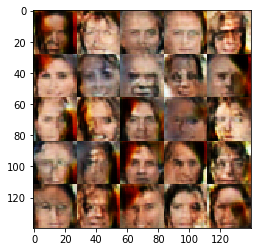

Epoch 1 of 1  Generator loss : 0.597121 Discrimator loss : 1.137965
Epoch 1 of 1  Generator loss : 0.122189 Discrimator loss : 3.289116
Epoch 1 of 1  Generator loss : 0.298109 Discrimator loss : 2.678098
Epoch 1 of 1  Generator loss : 0.814695 Discrimator loss : 1.042657
Epoch 1 of 1  Generator loss : 0.093622 Discrimator loss : 3.250213
Epoch 1 of 1  Generator loss : 0.726732 Discrimator loss : 0.919695
Epoch 1 of 1  Generator loss : 3.526474 Discrimator loss : 0.904422
Epoch 1 of 1  Generator loss : 0.062526 Discrimator loss : 3.758508
Epoch 1 of 1  Generator loss : 0.527738 Discrimator loss : 1.532636
Epoch 1 of 1  Generator loss : 0.269553 Discrimator loss : 2.123277
Epoch 1 of 1  Generator loss : 1.369526 Discrimator loss : 0.508835
Epoch 1 of 1  Generator loss : 0.183252 Discrimator loss : 2.684984
Epoch 1 of 1  Generator loss : 0.120437 Discrimator loss : 3.431344
Epoch 1 of 1  Generator loss : 1.573147 Discrimator loss : 0.969566
Epoch 1 of 1  Generator loss : 4.565458 Discrima

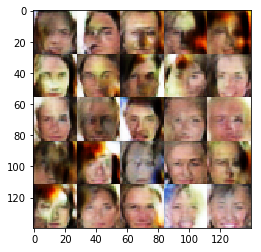

Epoch 1 of 1  Generator loss : 0.822702 Discrimator loss : 1.038926
Epoch 1 of 1  Generator loss : 0.130494 Discrimator loss : 4.152724
Epoch 1 of 1  Generator loss : 2.937222 Discrimator loss : 0.689707
Epoch 1 of 1  Generator loss : 3.118231 Discrimator loss : 0.403541
Epoch 1 of 1  Generator loss : 0.259251 Discrimator loss : 2.965392
Epoch 1 of 1  Generator loss : 1.095774 Discrimator loss : 1.244952
Epoch 1 of 1  Generator loss : 4.068677 Discrimator loss : 0.519411
Epoch 1 of 1  Generator loss : 0.362556 Discrimator loss : 1.810181
Epoch 1 of 1  Generator loss : 1.311665 Discrimator loss : 0.512388
Epoch 1 of 1  Generator loss : 2.635747 Discrimator loss : 0.647009
Epoch 1 of 1  Generator loss : 1.371941 Discrimator loss : 1.032946
Epoch 1 of 1  Generator loss : 1.167690 Discrimator loss : 0.912833
Epoch 1 of 1  Generator loss : 1.179377 Discrimator loss : 1.081360
Epoch 1 of 1  Generator loss : 1.844862 Discrimator loss : 0.486568
Epoch 1 of 1  Generator loss : 0.606154 Discrima

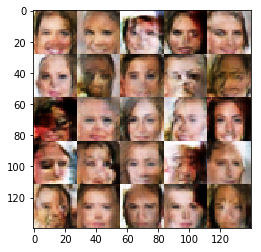

Epoch 1 of 1  Generator loss : 1.157931 Discrimator loss : 0.722573
Epoch 1 of 1  Generator loss : 2.296988 Discrimator loss : 0.510991
Epoch 1 of 1  Generator loss : 1.980984 Discrimator loss : 0.340657
Epoch 1 of 1  Generator loss : 2.422896 Discrimator loss : 0.365030
Epoch 1 of 1  Generator loss : 1.439553 Discrimator loss : 0.724983
Epoch 1 of 1  Generator loss : 1.818480 Discrimator loss : 0.483588
Epoch 1 of 1  Generator loss : 0.844400 Discrimator loss : 1.374362
Epoch 1 of 1  Generator loss : 0.417884 Discrimator loss : 2.038519
Epoch 1 of 1  Generator loss : 0.142579 Discrimator loss : 3.410959
Epoch 1 of 1  Generator loss : 0.546355 Discrimator loss : 1.833735
Epoch 1 of 1  Generator loss : 1.017199 Discrimator loss : 0.987879
Epoch 1 of 1  Generator loss : 1.071591 Discrimator loss : 0.914723
Epoch 1 of 1  Generator loss : 3.115561 Discrimator loss : 0.198132
Epoch 1 of 1  Generator loss : 0.111393 Discrimator loss : 3.393793
Epoch 1 of 1  Generator loss : 0.471414 Discrima

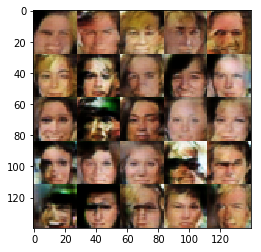

Epoch 1 of 1  Generator loss : 1.050071 Discrimator loss : 1.060443
Epoch 1 of 1  Generator loss : 0.034045 Discrimator loss : 4.274978
Epoch 1 of 1  Generator loss : 1.351171 Discrimator loss : 0.819841
Epoch 1 of 1  Generator loss : 4.604131 Discrimator loss : 0.638893
Epoch 1 of 1  Generator loss : 0.351167 Discrimator loss : 1.898703
Epoch 1 of 1  Generator loss : 0.183495 Discrimator loss : 3.093577
Epoch 1 of 1  Generator loss : 1.513428 Discrimator loss : 0.585703
Epoch 1 of 1  Generator loss : 1.800287 Discrimator loss : 0.287761
Epoch 1 of 1  Generator loss : 0.598825 Discrimator loss : 1.277822
Epoch 1 of 1  Generator loss : 0.620100 Discrimator loss : 1.552579
Epoch 1 of 1  Generator loss : 0.112297 Discrimator loss : 3.537070
Epoch 1 of 1  Generator loss : 0.712006 Discrimator loss : 1.558862
Epoch 1 of 1  Generator loss : 2.566259 Discrimator loss : 0.359910
Epoch 1 of 1  Generator loss : 0.907466 Discrimator loss : 1.179103
Epoch 1 of 1  Generator loss : 2.777244 Discrima

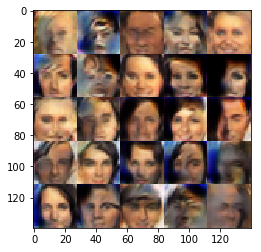

Epoch 1 of 1  Generator loss : 0.115045 Discrimator loss : 2.931508
Epoch 1 of 1  Generator loss : 0.663365 Discrimator loss : 1.623903
Epoch 1 of 1  Generator loss : 0.189458 Discrimator loss : 3.212720
Epoch 1 of 1  Generator loss : 0.490476 Discrimator loss : 2.663037
Epoch 1 of 1  Generator loss : 0.306468 Discrimator loss : 2.272137
Epoch 1 of 1  Generator loss : 0.355913 Discrimator loss : 2.240663
Epoch 1 of 1  Generator loss : 2.474288 Discrimator loss : 0.305876
Epoch 1 of 1  Generator loss : 0.824377 Discrimator loss : 0.982692
Epoch 1 of 1  Generator loss : 1.092270 Discrimator loss : 1.149950
Epoch 1 of 1  Generator loss : 2.046515 Discrimator loss : 0.456787
Epoch 1 of 1  Generator loss : 0.231727 Discrimator loss : 2.899889
Epoch 1 of 1  Generator loss : 3.656936 Discrimator loss : 0.523339
Epoch 1 of 1  Generator loss : 1.852731 Discrimator loss : 0.473479
Epoch 1 of 1  Generator loss : 2.329511 Discrimator loss : 0.265034
Epoch 1 of 1  Generator loss : 2.040416 Discrima

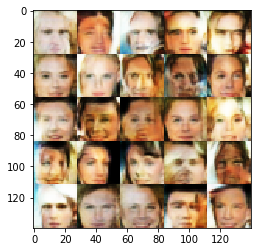

Epoch 1 of 1  Generator loss : 1.610792 Discrimator loss : 0.436826
Epoch 1 of 1  Generator loss : 4.654168 Discrimator loss : 0.333912
Epoch 1 of 1  Generator loss : 0.723745 Discrimator loss : 1.562710
Epoch 1 of 1  Generator loss : 1.077786 Discrimator loss : 1.203675
Epoch 1 of 1  Generator loss : 1.543049 Discrimator loss : 0.777430
Epoch 1 of 1  Generator loss : 0.385427 Discrimator loss : 2.195370
Epoch 1 of 1  Generator loss : 1.524954 Discrimator loss : 0.867973
Epoch 1 of 1  Generator loss : 0.158993 Discrimator loss : 2.767264
Epoch 1 of 1  Generator loss : 0.561985 Discrimator loss : 2.276535
Epoch 1 of 1  Generator loss : 1.063484 Discrimator loss : 1.101497
Epoch 1 of 1  Generator loss : 1.659550 Discrimator loss : 0.564096
Epoch 1 of 1  Generator loss : 2.648050 Discrimator loss : 0.385804
Epoch 1 of 1  Generator loss : 3.030005 Discrimator loss : 0.405691
Epoch 1 of 1  Generator loss : 0.424805 Discrimator loss : 2.350482
Epoch 1 of 1  Generator loss : 0.561876 Discrima

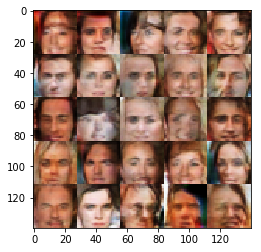

Epoch 1 of 1  Generator loss : 2.305611 Discrimator loss : 0.513211
Epoch 1 of 1  Generator loss : 0.556992 Discrimator loss : 1.572375
Epoch 1 of 1  Generator loss : 1.473185 Discrimator loss : 0.873872
Epoch 1 of 1  Generator loss : 0.874977 Discrimator loss : 1.216619
Epoch 1 of 1  Generator loss : 0.725235 Discrimator loss : 1.724444
Epoch 1 of 1  Generator loss : 0.055625 Discrimator loss : 3.259956
Epoch 1 of 1  Generator loss : 4.238615 Discrimator loss : 0.309339
Epoch 1 of 1  Generator loss : 0.590869 Discrimator loss : 1.842981
Epoch 1 of 1  Generator loss : 5.016968 Discrimator loss : 0.316440
Epoch 1 of 1  Generator loss : 0.173243 Discrimator loss : 3.358767
Epoch 1 of 1  Generator loss : 6.163004 Discrimator loss : 0.338716
Epoch 1 of 1  Generator loss : 1.007372 Discrimator loss : 1.337399
Epoch 1 of 1  Generator loss : 1.257955 Discrimator loss : 0.907365
Epoch 1 of 1  Generator loss : 2.313986 Discrimator loss : 0.448161
Epoch 1 of 1  Generator loss : 0.882437 Discrima

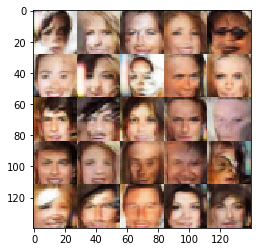

Epoch 1 of 1  Generator loss : 0.758609 Discrimator loss : 1.423785
Epoch 1 of 1  Generator loss : 1.586098 Discrimator loss : 0.574088
Epoch 1 of 1  Generator loss : 1.333403 Discrimator loss : 0.717226
Epoch 1 of 1  Generator loss : 5.798589 Discrimator loss : 0.107378
Epoch 1 of 1  Generator loss : 0.718713 Discrimator loss : 1.279392
Epoch 1 of 1  Generator loss : 2.109315 Discrimator loss : 0.522382
Epoch 1 of 1  Generator loss : 0.185878 Discrimator loss : 3.182400
Epoch 1 of 1  Generator loss : 0.098524 Discrimator loss : 3.651839
Epoch 1 of 1  Generator loss : 1.381887 Discrimator loss : 1.034784
Epoch 1 of 1  Generator loss : 1.521196 Discrimator loss : 0.588094
Epoch 1 of 1  Generator loss : 1.029346 Discrimator loss : 1.340909
Epoch 1 of 1  Generator loss : 5.730031 Discrimator loss : 0.532625
Epoch 1 of 1  Generator loss : 6.280395 Discrimator loss : 0.147891
Epoch 1 of 1  Generator loss : 2.038652 Discrimator loss : 0.345287
Epoch 1 of 1  Generator loss : 5.837091 Discrima

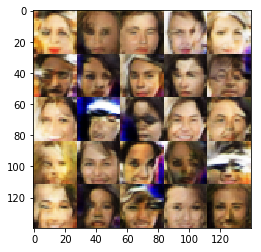

Epoch 1 of 1  Generator loss : 0.529717 Discrimator loss : 1.892906
Epoch 1 of 1  Generator loss : 0.669206 Discrimator loss : 1.660896
Epoch 1 of 1  Generator loss : 1.036256 Discrimator loss : 0.849185
Epoch 1 of 1  Generator loss : 1.705641 Discrimator loss : 0.515154
Epoch 1 of 1  Generator loss : 1.821176 Discrimator loss : 0.503514
Epoch 1 of 1  Generator loss : 0.179663 Discrimator loss : 3.439155
Epoch 1 of 1  Generator loss : 2.826540 Discrimator loss : 0.485386
Epoch 1 of 1  Generator loss : 1.124791 Discrimator loss : 1.156626
Epoch 1 of 1  Generator loss : 1.375004 Discrimator loss : 0.941657
Epoch 1 of 1  Generator loss : 0.744761 Discrimator loss : 1.205247
Epoch 1 of 1  Generator loss : 0.396683 Discrimator loss : 1.708962
Epoch 1 of 1  Generator loss : 1.262931 Discrimator loss : 1.017996
Epoch 1 of 1  Generator loss : 6.243620 Discrimator loss : 0.060697
Epoch 1 of 1  Generator loss : 1.819587 Discrimator loss : 0.642613
Epoch 1 of 1  Generator loss : 5.011266 Discrima

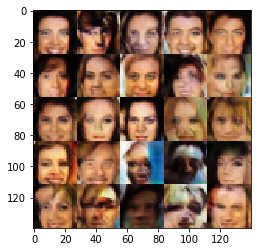

Epoch 1 of 1  Generator loss : 4.382666 Discrimator loss : 0.138201
Epoch 1 of 1  Generator loss : 1.062567 Discrimator loss : 1.691792
Epoch 1 of 1  Generator loss : 1.466882 Discrimator loss : 0.947028
Epoch 1 of 1  Generator loss : 0.664540 Discrimator loss : 1.311002
Epoch 1 of 1  Generator loss : 1.281668 Discrimator loss : 1.139662
Epoch 1 of 1  Generator loss : 0.375952 Discrimator loss : 2.077262
Epoch 1 of 1  Generator loss : 3.460898 Discrimator loss : 0.327883
Epoch 1 of 1  Generator loss : 1.616094 Discrimator loss : 0.549108
Epoch 1 of 1  Generator loss : 0.982157 Discrimator loss : 1.100070
Epoch 1 of 1  Generator loss : 4.133629 Discrimator loss : 0.085498
Epoch 1 of 1  Generator loss : 2.055643 Discrimator loss : 0.307510
Epoch 1 of 1  Generator loss : 1.465621 Discrimator loss : 1.173363
Epoch 1 of 1  Generator loss : 0.906923 Discrimator loss : 1.122751
Epoch 1 of 1  Generator loss : 1.153047 Discrimator loss : 1.289583
Epoch 1 of 1  Generator loss : 0.677426 Discrima

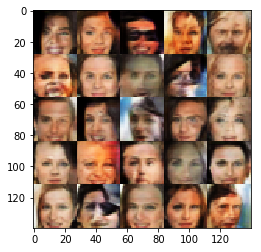

Epoch 1 of 1  Generator loss : 2.399920 Discrimator loss : 0.311122
Epoch 1 of 1  Generator loss : 2.824579 Discrimator loss : 0.271656
Epoch 1 of 1  Generator loss : 0.662527 Discrimator loss : 1.797591
Epoch 1 of 1  Generator loss : 1.748036 Discrimator loss : 0.749518
Epoch 1 of 1  Generator loss : 0.630208 Discrimator loss : 1.697323
Epoch 1 of 1  Generator loss : 12.280665 Discrimator loss : 2.810194
Epoch 1 of 1  Generator loss : 2.759832 Discrimator loss : 0.179593
Epoch 1 of 1  Generator loss : 5.291462 Discrimator loss : 0.105470
Epoch 1 of 1  Generator loss : 1.498572 Discrimator loss : 0.642682
Epoch 1 of 1  Generator loss : 6.302046 Discrimator loss : 0.235546
Epoch 1 of 1  Generator loss : 0.381234 Discrimator loss : 1.858824
Epoch 1 of 1  Generator loss : 0.669434 Discrimator loss : 2.022112
Epoch 1 of 1  Generator loss : 0.507286 Discrimator loss : 1.776302
Epoch 1 of 1  Generator loss : 1.380075 Discrimator loss : 0.788743
Epoch 1 of 1  Generator loss : 8.821039 Discrim

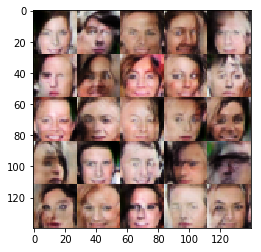

Epoch 1 of 1  Generator loss : 1.055118 Discrimator loss : 1.598389
Epoch 1 of 1  Generator loss : 5.513039 Discrimator loss : 0.179840
Epoch 1 of 1  Generator loss : 2.316162 Discrimator loss : 0.297619
Epoch 1 of 1  Generator loss : 0.506653 Discrimator loss : 1.984373
Epoch 1 of 1  Generator loss : 5.160970 Discrimator loss : 0.123742
Epoch 1 of 1  Generator loss : 2.081670 Discrimator loss : 0.545664
Epoch 1 of 1  Generator loss : 1.214745 Discrimator loss : 1.074876
Epoch 1 of 1  Generator loss : 0.512467 Discrimator loss : 2.388857
Epoch 1 of 1  Generator loss : 2.629653 Discrimator loss : 0.391408
Epoch 1 of 1  Generator loss : 1.455561 Discrimator loss : 0.993432
Epoch 1 of 1  Generator loss : 4.786447 Discrimator loss : 0.098063
Epoch 1 of 1  Generator loss : 0.516589 Discrimator loss : 1.717814
Epoch 1 of 1  Generator loss : 1.261803 Discrimator loss : 0.899861
Epoch 1 of 1  Generator loss : 1.087686 Discrimator loss : 1.227893
Epoch 1 of 1  Generator loss : 6.153613 Discrima

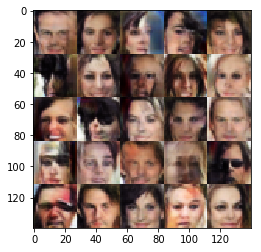

Epoch 1 of 1  Generator loss : 0.340188 Discrimator loss : 2.485750
Epoch 1 of 1  Generator loss : 1.750313 Discrimator loss : 0.483861
Epoch 1 of 1  Generator loss : 5.147613 Discrimator loss : 0.086469
Epoch 1 of 1  Generator loss : 3.027299 Discrimator loss : 0.187331
Epoch 1 of 1  Generator loss : 0.711123 Discrimator loss : 1.197948
Epoch 1 of 1  Generator loss : 4.475771 Discrimator loss : 0.346235
Epoch 1 of 1  Generator loss : 0.477788 Discrimator loss : 3.046531
Epoch 1 of 1  Generator loss : 1.090323 Discrimator loss : 1.772742
Epoch 1 of 1  Generator loss : 2.168121 Discrimator loss : 0.494865
Epoch 1 of 1  Generator loss : 4.479391 Discrimator loss : 0.244952
Epoch 1 of 1  Generator loss : 1.028858 Discrimator loss : 1.732578
Epoch 1 of 1  Generator loss : 2.707573 Discrimator loss : 0.268176
Epoch 1 of 1  Generator loss : 2.424706 Discrimator loss : 0.373365
Epoch 1 of 1  Generator loss : 8.477935 Discrimator loss : 0.487862
Epoch 1 of 1  Generator loss : 3.309107 Discrima

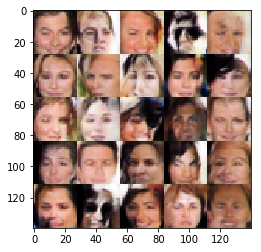

Epoch 1 of 1  Generator loss : 5.465929 Discrimator loss : 0.050288
Epoch 1 of 1  Generator loss : 3.598355 Discrimator loss : 0.180683
Epoch 1 of 1  Generator loss : 4.778991 Discrimator loss : 0.111004
Epoch 1 of 1  Generator loss : 3.901053 Discrimator loss : 0.113725
Epoch 1 of 1  Generator loss : 2.079659 Discrimator loss : 0.576202
Epoch 1 of 1  Generator loss : 0.411111 Discrimator loss : 2.773954
Epoch 1 of 1  Generator loss : 3.521966 Discrimator loss : 0.141688
Epoch 1 of 1  Generator loss : 2.199165 Discrimator loss : 0.530746
Epoch 1 of 1  Generator loss : 1.905191 Discrimator loss : 0.706790
Epoch 1 of 1  Generator loss : 0.204132 Discrimator loss : 3.051137
Epoch 1 of 1  Generator loss : 2.264034 Discrimator loss : 0.446304
Epoch 1 of 1  Generator loss : 2.212108 Discrimator loss : 0.683772
Epoch 1 of 1  Generator loss : 0.994603 Discrimator loss : 1.126528
Epoch 1 of 1  Generator loss : 0.582979 Discrimator loss : 1.532896
Epoch 1 of 1  Generator loss : 5.925956 Discrima

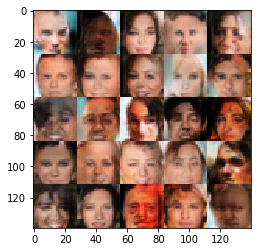

In [22]:
batch_size = 32
z_dim = 100
learning_rate = 0.0008
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.